# 군집화(Clustering)

전체 데이터를 보다 일관성과 응집성이 높은 세부 그룹으로 나누는 분석

----------

## k-means이란?

- 거리 기반 알고리즘
- <span style='background-color: #f5f0ff'>**집단 내 동질성, 집단 간 이질성**</span>
- **임의의 지점을 선택**해 해당 중심에서 가장 가까운 포인트들을 선택하여 **평균**을 중심으로 모임
- 군집의 수 k가 정해져야 알고리즘 실행 가능

### 단점
  
- 초기 군집 수(k)에 따라 결과가 달라짐
- 변수의 유형에 제한이 있음(<span style='background-color: #f5f0ff'>범주형 변수 사용 불가</span>)
- 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐

### 원리
1. k값을 초기값으로 먼저 받고, k개의 중심점 랜덤하게 선택
2. K개의 중심값과 각 개별 개체간의 거리 측정  
 가장 가까운 중심점 군집으로 재할당  
3. 각 군집마다 새로운 중심값과의 거리 재측정
4. 더 이상 중심값이 이동하지 않을 때까지 반복 후 변동 없다면 멈춤

### 중요 파라미터

> <span style='background-color: #f5f0ff'>**n_clusters**</span> = 군집화할 개수  
> **init** = 군집 중심점의 좌표를 설정할 방식, 일반적으로 **'k-means++'** 설정  
> max_iter[default = 300] = 최대 반복 횟수

### 주요 속성

> labels = 각 데이터 포인트가 속한 군집 중심점 레이블  
> cluster_centers_ = 각 군집 중심점 좌표로, 군집 중심점 좌표의 위치를 시각화할 때 사용됨

### 참고

군집화는 학습하는 과정이 없기 때문에 train과 test로 분리하는 과정이 없음

### 군집화하기

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 dataframe으로 변환
iris_df = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


> 3개 그룹으로 군집화하기

In [3]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(iris_df)

C:\Users\Min\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
kmeans.labels_ # iris_df의 각 데이터가 어떤 중심에 속하는지 알아보기

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

> 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보기

In [5]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

> 시각화를 위한 차원 축소

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# iris.data_pca = pca.fit_transform(iris.data)
pca.fit(iris.data)
iris.data_pca = pca.transform(iris.data)

iris.data_pca

iris_df['pca_x'] = iris.data_pca[:, 0]
iris_df['pca_y'] = iris.data_pca[:, 1]
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


> 산점도로 시각화하기

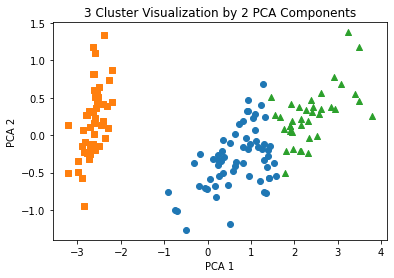

In [71]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x와 pca_y 값 추출, o, s, ^로 마커 표시
plt.scatter(x = iris_df.loc[marker0_ind, 'pca_x'], y = iris_df.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = iris_df.loc[marker1_ind, 'pca_x'], y = iris_df.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = iris_df.loc[marker2_ind, 'pca_x'], y = iris_df.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

------------

In [10]:
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(iris.data_pca)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 군집화 알고리즘 테스트

#### 종류

- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 있음
- make_calssifcation() : 노이즈를 포함한 데이터를 만드는 데 유용함
- make_circle(), make_moon() : 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용

#### make_blobs() 호출 파라미터

- **n_samples**[default = 100] = 생성할 총 데이터의 수
- **n_features** = 데이터의 피처 개수
- **centers** = int 값, 군집의 개수 / ndarray 형태일 경우 개별 군집 중심점의 좌표
- **cluster_std** = 생성될 군집 데이터의 표준 편차

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape)
y.shape

(200, 2)


(200,)

In [77]:
# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

[0 1 2] [67 67 66]


=> 3개의 cluster 값은 [0,1,2]이며, 각각 67,67,66개로 균일하게 구성되어 있음

In [78]:
import pandas as pd

cluster_df = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df[:3]

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


> make_blobs()로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인해보기

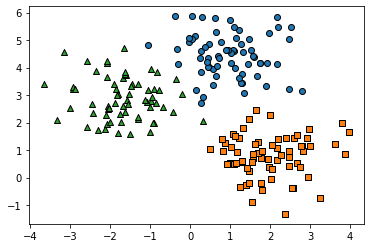

In [82]:
target_list = np.unique(y)

# 각 타겟별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target == 0, target == 1, target == 2로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])

plt.show()

> KMeans 군집화를 수행한 뒤에 군집별로 시각화하기

In [84]:
# 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [85]:
# 개별 클러스터의 중심 위치 좌표 시각화를 위해 cluster_centers_ 속성 호출
centers = kmeans.cluster_centers_

In [86]:
unique_labels = np.unique(cluster_labels)

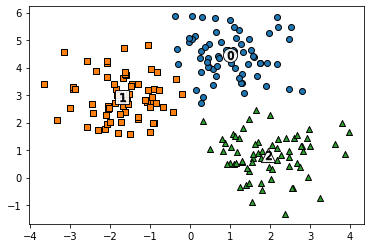

In [89]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', alpha = 0.9, edgecolor = 'k', marker = '$%d$' % label)
                
plt.show()

In [90]:
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

----------------

> 강사님 version

(200, 2) (200,)
[0 1 2] [67 67 66]


<AxesSubplot:>

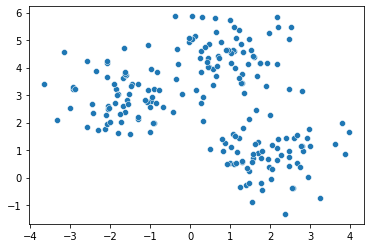

In [83]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [40]:
cluster_labels = kmeans.fit_predict(X) # 클러스터링 수행
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

> 200개의 데이터가 각각 몇 번 군집으로 할당되었는지 나타내기

y와 label을 비교해서 몇 개나 같은지? 알아보기 위해 2를 1로, 1을 2로 바꾸어주자.

In [43]:
y[y==2] = 3
y[y==1] = 2
y[y==3] = 1

In [44]:
y

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [45]:
kmeans.labels_ == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

---------

## 적정 k값 구하는 방법

### <span style="color: red">엘보우(elbow) 기법</span>

: 여러 가지 k값에 대한 군집 분석 결과의 군집 내에 얼마나 밀집되어 있는가를 나타내는 통계량의 합을 기준으로<br>
**크기의 변화가 작아지는 지점**을 적정 군집수로 결정하는 방법

<p align="center"><img src="./elbow.png"></p>

기울기가 <span style="color: orange">**급격하게 완만**</span>해진다면 그 부분이 **elbow point**임

### 실루엣 계수

군집 내 동질적인 정도와 군집 간 이질적인 정도를 수치화한 값
- 1에 가까울수록 군집화가 잘 됨, -1에 가까울수록 군집화가 잘 되지 않음

---------

## 군집 평가(Cluster Evaluation)

<span style="color: #2D3748; background-color:#fff5b1;">**실루엣 분석**</span> (silhouette analysis) : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지  
  
                          s(i) = $\frac {(b(i)-a(i))}{(max(a(i),b(i))}$

a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값  
b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리  
=> <span style="color: #2D3748; background-color:#fff5b1;">**s(i)** 가 **1**에 **가까울수록 좋음**</span>  
=> a(i)는 작을수록, b(i)는 클수록 좋음

----------

## 계층적 군집화란?

: 가까운 관측 값들끼리 묶는 병합과 먼 관측 값들을 나누어 가는 분할에 의해 전체 군집들간 **구조적 관계**를 분석하는 기법  
> 덴드로그램(Dendrogram)을 통해 시각화 가능  

<p align="center"><img src="./dendrogram.png"></p>

### 방식

<p align="center"><img src="./g.png"></p>

### 실루엣 계수 구하기

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [23]:
iris = load_iris()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)

In [25]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [28]:
# 모든 데이터의 평균 실루엣 계수 값을 구함
np.round(silhouette_score(iris.data, kmeans.labels_), 3)

0.553

In [30]:
silhouette_samples(iris.data, kmeans.labels_) # 모든 개별 데이터에 실루엣 계수 값을 구함

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

#### 시각화

In [34]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1,
                  center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

> 산점도

<AxesSubplot:>

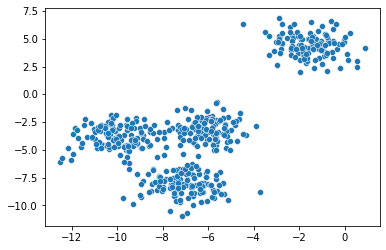

In [36]:
import seaborn as sns
sns.scatterplot(x = X[:, 0], y = X[:, 1])

In [46]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

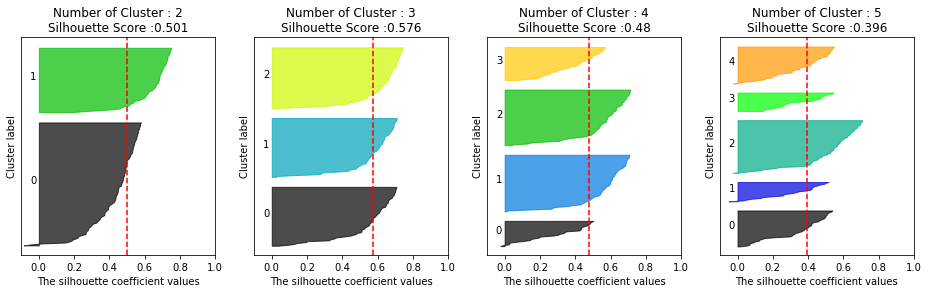

In [47]:
# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

-----------------

# 평균이동(Mean Shift)

## KDE(Kernel Density Estimation)

커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8) # 대역폭 h = 0.8로 지정
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels) # cluster labels 유형

array([0, 1, 2, 3, 4, 5], dtype=int64)

=> 군집이 0부터 5까지 6개 분류됐음 / 대역폭 작게 설정할수록 군집 개수 많아짐

In [51]:
meanshift = MeanShift(bandwidth = 1.0) # 대역폭 h = 1로 지정
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

=> 3개의 군집으로 군집화됨

데이터의 분표 유형에 따라 **bandwidth 값의 변화**는 **군집화 개수에 큰 영향**을 미칠 수 있음  
따라서, MeanShift에서는 <span style="color: blue">*bandwidth를 최적화 값으로 설정*</span>하는 것이 매우 중요함

# GMM(Gaussian Mixture Model)

# k-means vs GMM

#  DBSCAN

**입실론** 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식  
  ㄴ> epsilon) 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')

In [55]:
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
from sklearn.datasets import make_circles

In [61]:
X, y = make_circles(n_samples = 1000, noise = 0.05, random_state = 0, factor = 0.5)

<AxesSubplot:>

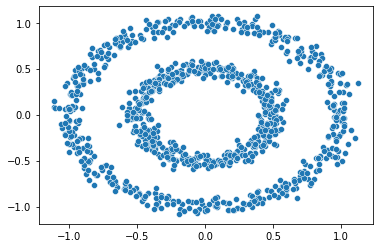

In [62]:
sns.scatterplot(x = X[:, 0], y = X[:, 1])

In [63]:
dbscan = DBSCAN(eps = 0.2, min_samples = 10)

In [64]:
dbscan.fit_predict(X)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,